# House Price Prediction using Linear Regression  
This project aims to develop a Linear Regression model to predict house prices based on features such as  
- The number of rooms  
- Location (latitude & longitude)  
- Median income  
- Housing age  

# Steps Covered:
1. Load and explore the dataset
2. Preprocess the data (handle missing values, select features)
3. Train a Linear Regression model
4. Evaluate the model using MSE & R2 score
5. Visualize predictions

In [1]:

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#1. Load and Explore the Dataset  
We load the housing dataset and at first do the exploration, including checking for missing values and  
visualizing the data for better understanding.

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# checking for the null values in the dataset

In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

# Handling missing values (if any)
df = df.dropna()
# Convert 'ocean_proximity' to numbers
encoder = LabelEncoder()
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])
# adding new column 
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df['income_per_room'] = df['median_income'] / df['total_rooms']
df['location_interaction'] = df['latitude'] * df['longitude']
# Now include it in X
X = df[['total_rooms', 'total_bedrooms', 'households', 'median_income', 
        'housing_median_age', 'latitude', 'longitude', 'ocean_proximity', 'rooms_per_household','bedrooms_per_room','population_per_household','income_per_room','location_interaction']]
y = df["median_house_value"] # Target variable 

In [6]:
# Get the unique category-to-number mapping
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
{'<1H OCEAN': 0, 'INLAND': 1, 'ISLAND': 2, 'NEAR BAY': 3, 'NEAR OCEAN': 4}


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20433 non-null  float64
 1   latitude                  20433 non-null  float64
 2   housing_median_age        20433 non-null  float64
 3   total_rooms               20433 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20433 non-null  float64
 6   households                20433 non-null  float64
 7   median_income             20433 non-null  float64
 8   median_house_value        20433 non-null  float64
 9   ocean_proximity           20433 non-null  int64  
 10  rooms_per_household       20433 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20433 non-null  float64
 13  income_per_room           20433 non-null  float64
 14  location_in

# visualizing the data

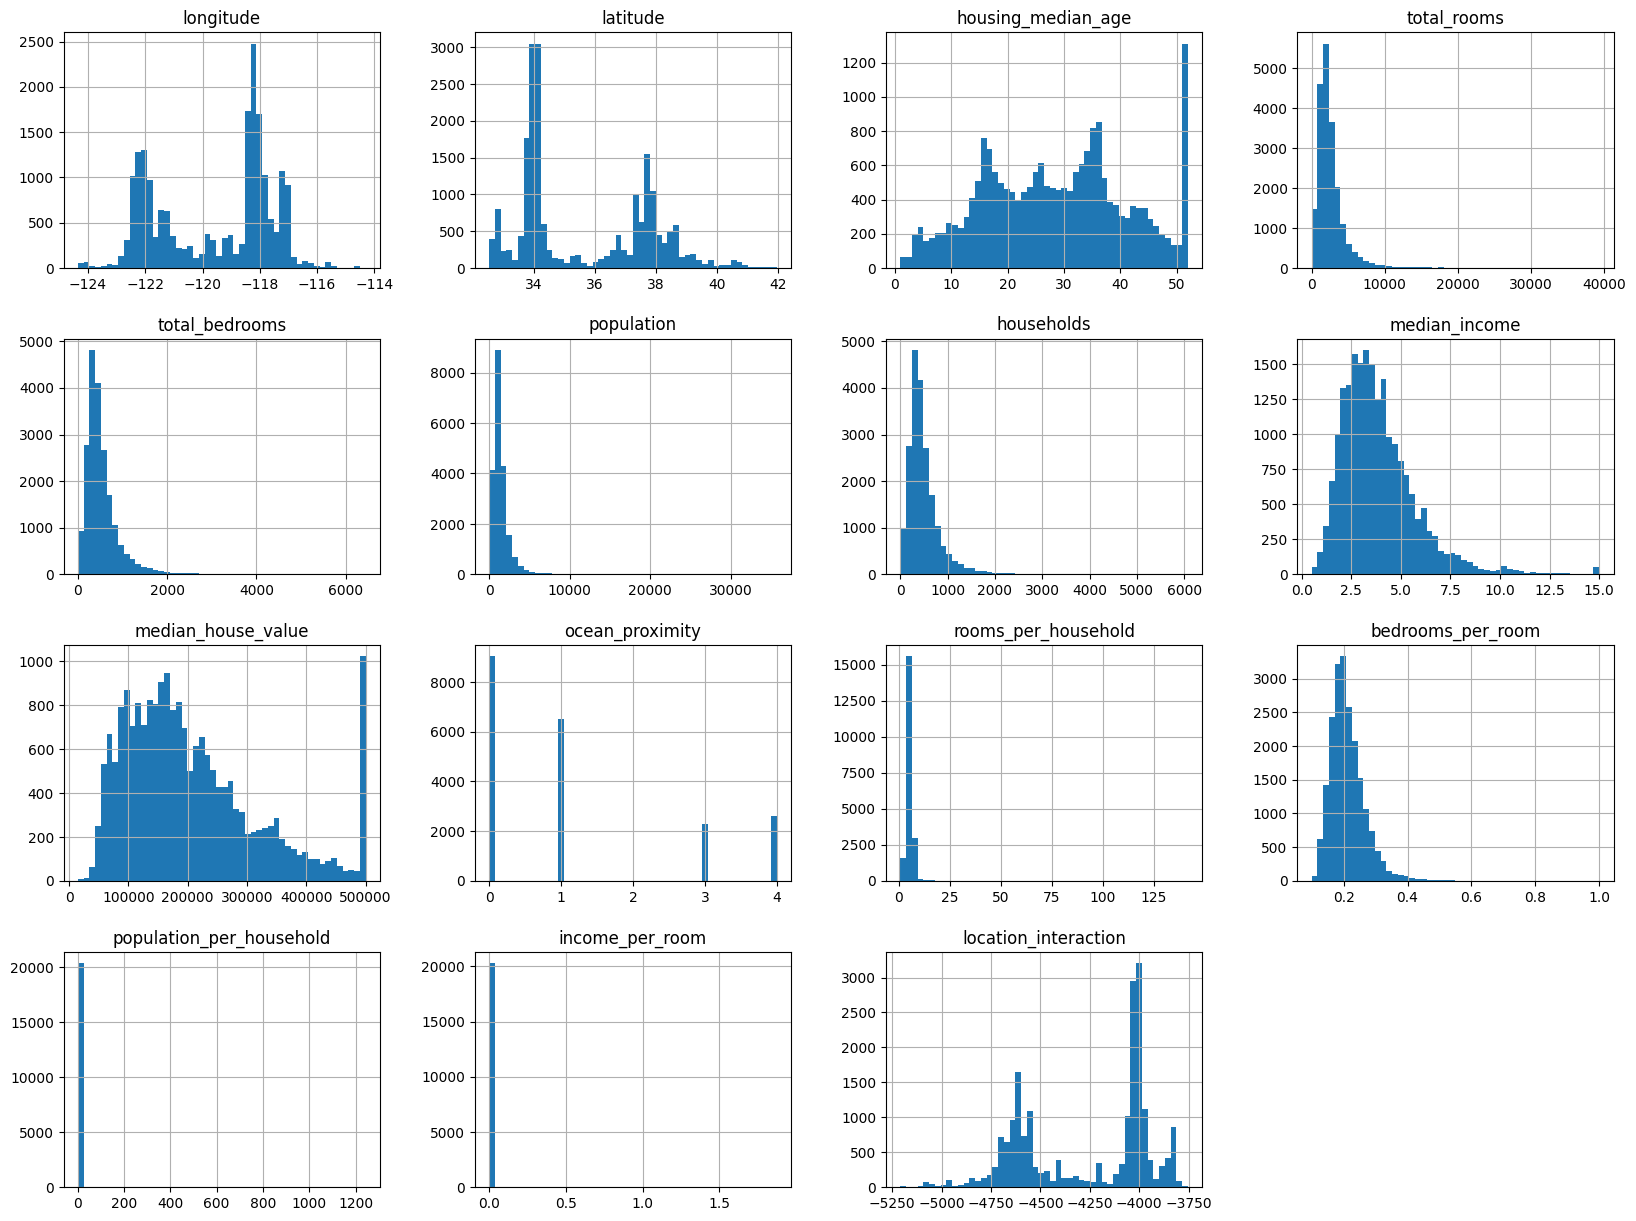

In [8]:
%matplotlib inline
df.hist(bins= 50, figsize=(20,15))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

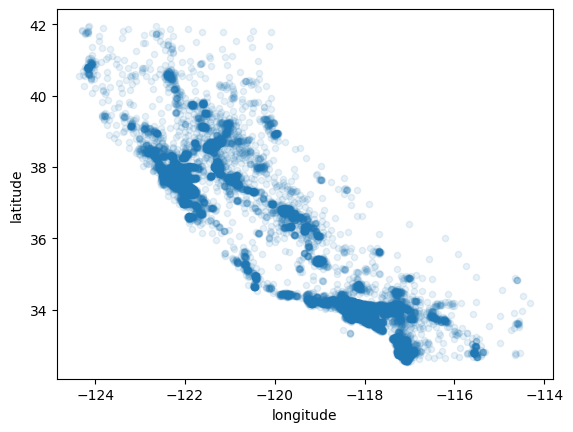

In [9]:
df.plot(kind = "scatter",x = "longitude",y = "latitude",alpha = 0.1)

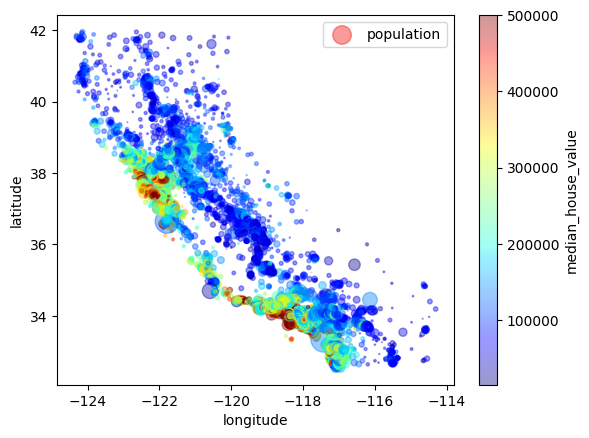

In [10]:
df.plot(kind = "scatter",x = "longitude",y = "latitude",alpha = 0.4,s = df["population"]/100,label = "population",c = "median_house_value",cmap=plt.get_cmap("jet"),colorbar = True)
plt.legend()

<Axes: >

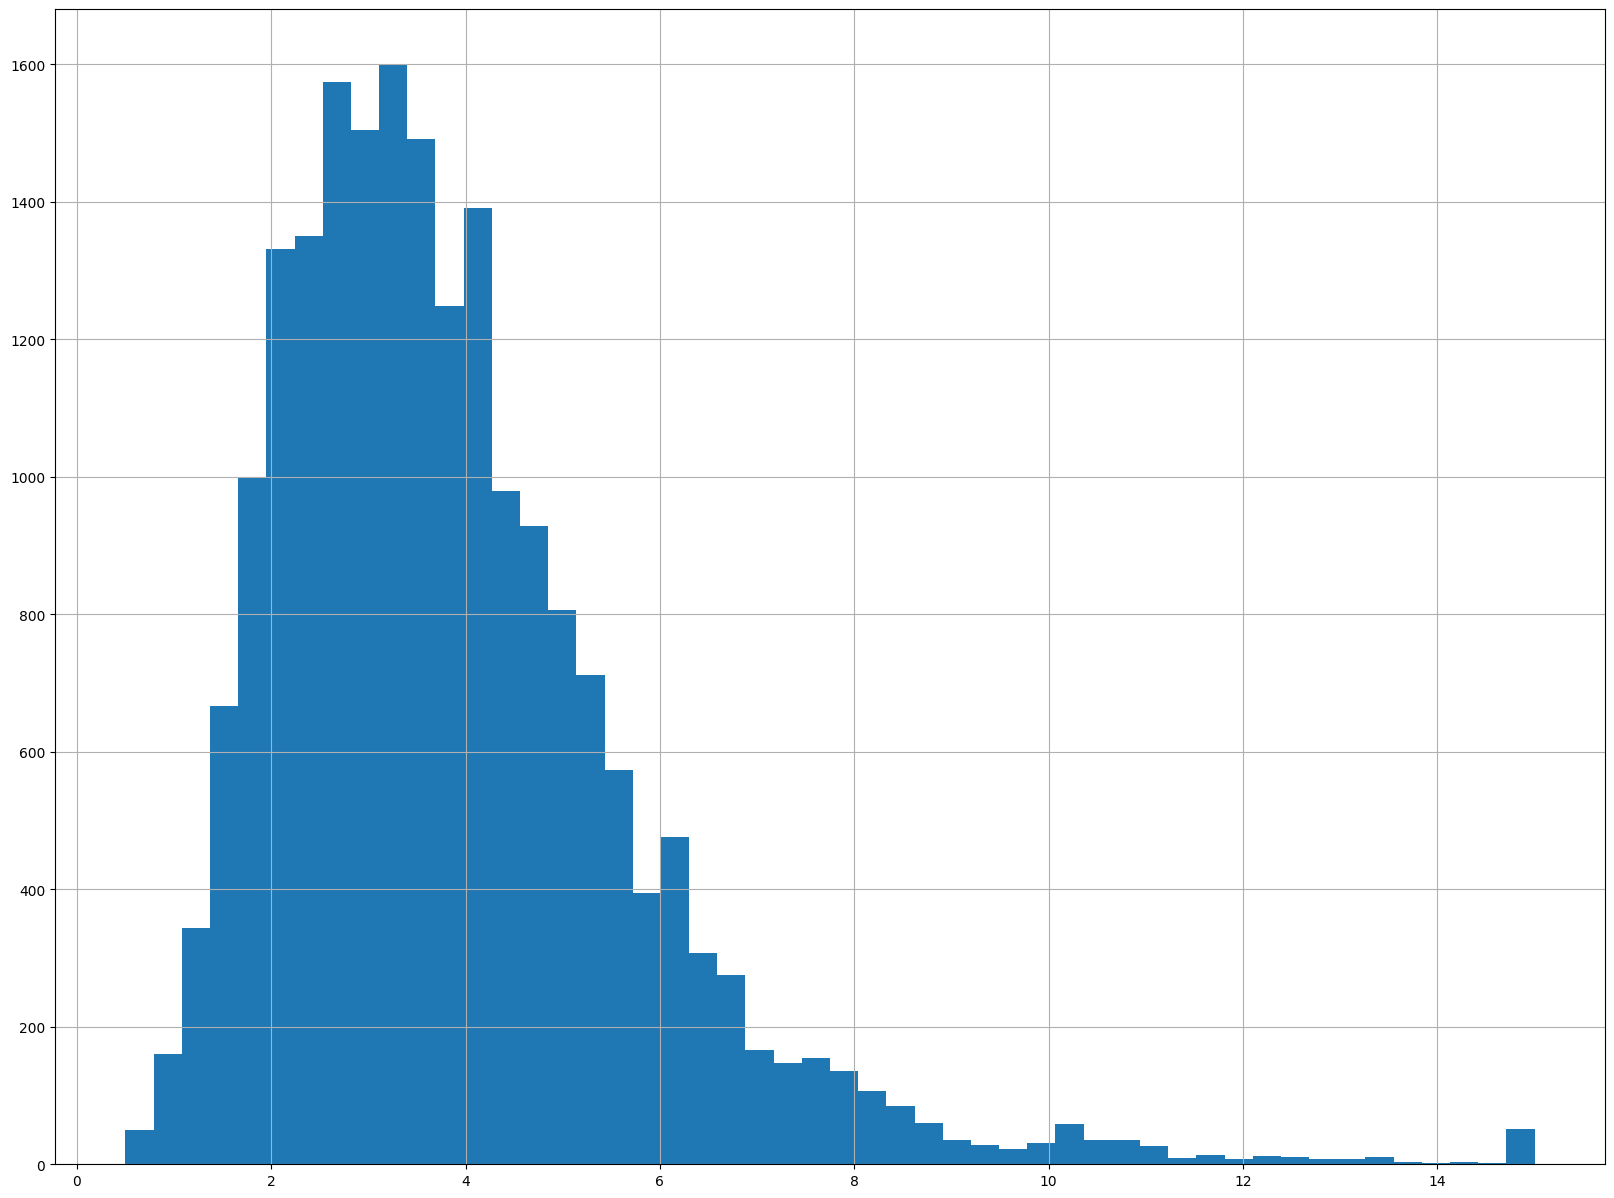

In [11]:
df["median_income"].hist(bins = 50,figsize=(20,15))

In [12]:
df["median_income"].describe()

count    20433.000000
mean         3.871162
std          1.899291
min          0.499900
25%          2.563700
50%          3.536500
75%          4.744000
max         15.000100
Name: median_income, dtype: float64

#2. Train-Test Split and Model Training  
Now, we split the dataset into training set (80%) and testing set (20%).  
We use **Linear Regression** to predict house prices based on selected features.

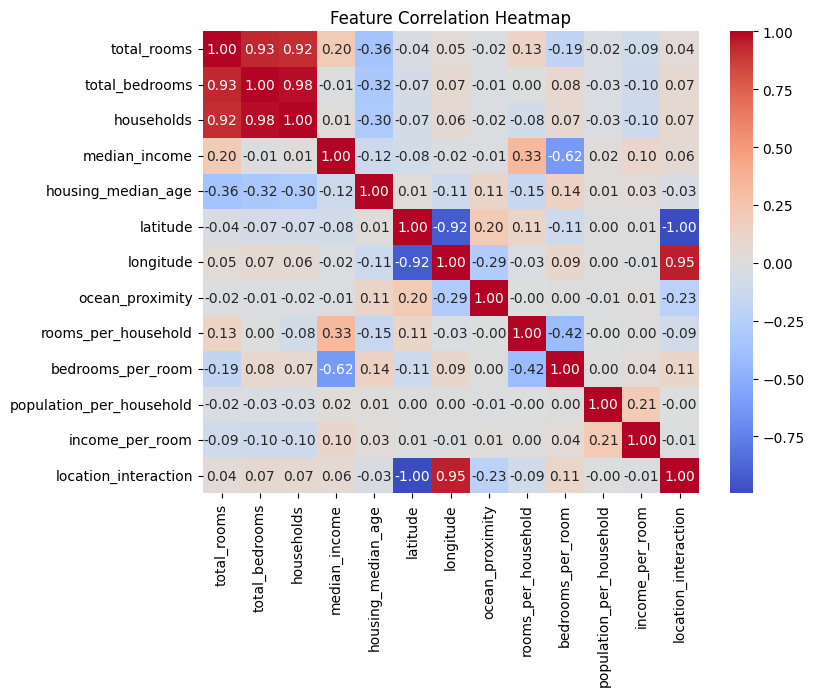

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = X.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = X.corr()

# Find highly correlated features
high_corr_features = set()
threshold = 0.85
for col in corr_matrix.columns:
    for index in corr_matrix.index:
        if abs(corr_matrix.loc[index, col]) > threshold and col != index:
            high_corr_features.add(index)  # Add feature to remove

# Remove highly correlated features
X_filtered = X.drop(columns=high_corr_features)
print("Removed features:", high_corr_features)
X_filtered

Removed features: {'location_interaction', 'households', 'total_bedrooms', 'total_rooms', 'longitude', 'latitude'}


,median_income,housing_median_age,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,income_per_room
0,8.3252,41.0,3,6.984127,0.146591,2.555556,0.009460
1,8.3014,21.0,3,6.238137,0.155797,2.109842,0.001169
2,7.2574,52.0,3,8.288136,0.129516,2.802260,0.004947
3,5.6431,52.0,3,5.817352,0.184458,2.547945,0.004429
4,3.8462,52.0,3,6.281853,0.172096,2.181467,0.002364
...,...,...,...,...,...,...,...
20635,1.5603,25.0,1,5.045455,0.224625,2.560606,0.000937
20636,2.5568,18.0,1,6.114035,0.215208,3.122807,0.003668
20637,1.7000,17.0,1,5.205543,0.215173,2.325635,0.000754
20638,1.8672,18.0,1,5.329513,0.219892,2.123209,0.001004


In [15]:
 # Scale all features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

# 3. Train a Linear Regression model


In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# 4. Evaluate the model using MSE & R2 score

In [18]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("\n -> Model Evaluation <-")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}") 


 -> Model Evaluation <-
Mean Squared Error (MSE): 6062353703.48
R² Score: 0.5567


# 5. Visualize predictions

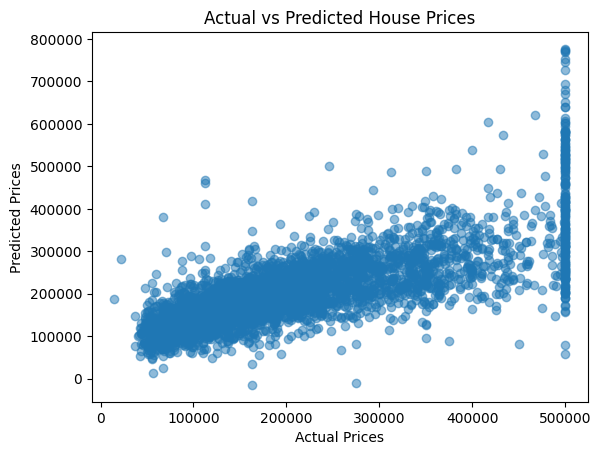

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# sample dataset for the model

In [21]:
import numpy as np

# Example houses with sample feature values
sample_houses = np.array([
    [6.0, 25, 1, 5.3, 0.2, 3.1, 0.6],  # House 1: High income, mid-age, near ocean
    [3.5, 15, 2, 6.1, 0.15, 2.8, 0.8],  # House 2: Medium income, newer house, inland
    [1.2, 40, 3, 4.8, 0.18, 3.5, 0.5],  # House 3: Low income, old house, near bay
    [5.0, 10, 4, 5.8, 0.12, 3.0, 0.7],  # House 4: Good income, very new, island location
])

# Scale the sample data using the same scaler from training
sample_houses_scaled = scaler.transform(sample_houses)

# Predict house prices
predicted_prices = model.predict(sample_houses_scaled)

# Display results
for i, price in enumerate(predicted_prices):
    print(f"Predicted price for House {i+1}: ${price:.2f}")

Predicted price for House 1: $119757.42
Predicted price for House 2: $-112446.14
Predicted price for House 3: $-81550.42
Predicted price for House 4: $-14190.19


/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Function for user- input to predict the price for new values

In [22]:
def predict_house_price(median_income,housing_median_age,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,income_per_room):
    input_data = [[median_income,housing_median_age,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,income_per_room]]
    predicted_price = model.predict(input_data)[0]
    return f"Predicted House Price: ${predicted_price:,.2f}"

#user input for new Prediction 
predict_house_price(6.1,20.1,2,2.1,0.13,4.7,0.3)

'Predicted House Price: $1,222,519.00'

#4. Conclusion  
- Our **Linear Regression model** predicts house prices based on total rooms, median income, and location.  
- The model achieved an **R² score of 0.55**, meaning it explains 55% of price variations.  
- Future improvements could include **Decision Trees** or **Random Forest** for better accuracy.